,title,category,data
0,패션의류,[50000000],"[{'period': '2024-11-19', 'ratio': 84.72279}, ..."


수집된 데이터:


,date,group,ratio
0,2024-11-19,패션의류,84.72279
1,2024-11-20,패션의류,80.30131
2,2024-11-21,패션의류,70.72846
3,2024-11-22,패션의류,63.38259
4,2024-11-23,패션의류,74.26443


성별/연령대별 비율 분석 결과:


,date,group,ratio
0,2024-11-19,패션의류,84.72279
1,2024-11-20,패션의류,80.30131
2,2024-11-21,패션의류,70.72846
3,2024-11-22,패션의류,63.38259
4,2024-11-23,패션의류,74.26443
5,2024-11-24,패션의류,93.11291
6,2024-11-25,패션의류,79.42406
7,2024-11-26,패션의류,79.64796
8,2024-11-27,패션의류,81.63129
9,2024-11-28,패션의류,74.85856


분석 결과가 'naver_shopping_analysis.csv'에 저장되었습니다.
수집된 데이터:
         date category group     ratio
0  2024-11-19     패션의류  패션의류  84.72279
1  2024-11-20     패션의류  패션의류  80.30131
2  2024-11-21     패션의류  패션의류  70.72846
3  2024-11-22     패션의류  패션의류  63.38259
4  2024-11-23     패션의류  패션의류  74.26443
분석 결과가 'naver_shopping_multiple_categories.csv'에 저장되었습니다.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      256 non-null    object 
 1   category  256 non-null    object 
 2   group     256 non-null    object 
 3   ratio     256 non-null    float64
dtypes: float64(1), object(3)
memory usage: 8.1+ KB
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.5 MB/s eta 0:00:00
월별 평균 ratio:
month
11    78.973609
12    79.543559
Name: ratio, dtype: float64

요일별 평균 ratio:
dayofweek
0    84.939273
1    82.711838
2    80.494882
3    76.896387
4    69.370321
5    7

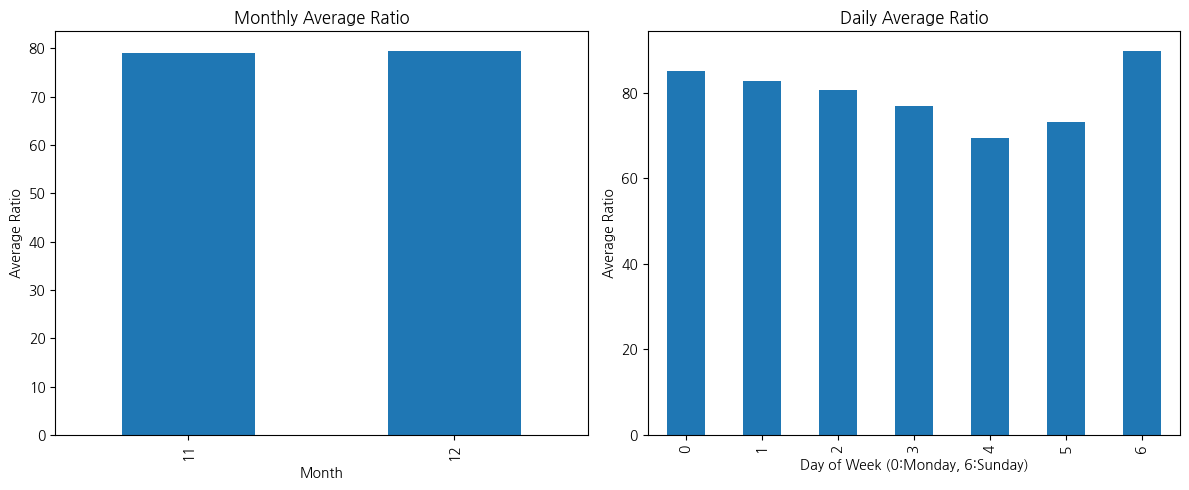

category,가구/인테리어,디지털/가전,생활/건강,스포츠/레저,여가/생활편의,출산/육아,패션의류,화장품/미용
month,,,,,,,,
11,80.672161,85.687677,78.248756,83.974412,84.892737,69.119254,77.310050,71.883825
12,83.108340,83.479408,70.331909,88.413393,90.514291,67.656687,72.756542,80.087900


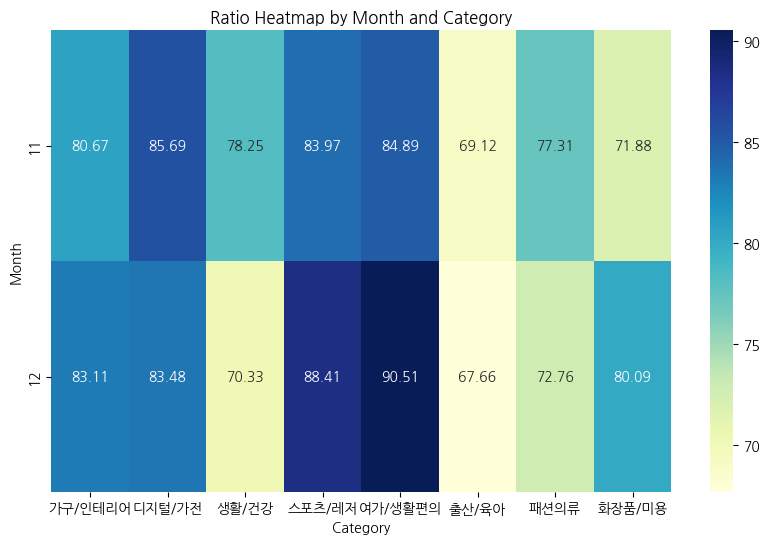

In [1]:
import requests
import pandas as pd

# 네이버 API 인증 정보
# client_id = "YOUR_CLIENT_ID"  # 네이버 API Client ID
# client_secret = "YOUR_CLIENT_SECRET"  # 네이버 API Client Secret

from google.colab import userdata
client_id = userdata.get('client_id')
client_secret = userdata.get("client_secret")

# 검색어 트렌드 API URL
url = "https://openapi.naver.com/v1/datalab/shopping/categories"

# 요청 데이터 설정
headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
    "Content-Type": "application/json"
}

# 검색 데이터 요청 파라미터
body = {
    "startDate": "2024-11-19",
    "endDate": "2024-12-20",
    "timeUnit": "date",
    "category": [{"name": "패션의류", "param": ["50000000"]}],
    "device": "mo",
    "gender": "f",
    "ages": ["20", "30"]
}

# API 요청
response = requests.post(url, headers=headers, json=body)

# 응답 처리
if response.status_code == 200:
    data = response.json()

    display(pd.DataFrame(data['results']))
    # 분석 데이터프레임 생성
    results = []
    for category_data in data["results"]:
        for data_point in category_data["data"]:
            results.append({
                "date": data_point["period"],
                "group": category_data["title"],
                "ratio": data_point["ratio"]
            })

    # 데이터프레임 생성
    df = pd.DataFrame(results)

    # 데이터 출력
    print("수집된 데이터:")
    display(df.head())

    # 분석 예: 날짜별, 성별/연령대별 비율 평균 계산
    grouped = df.groupby(["date", "group"])["ratio"].mean().reset_index()
    print("성별/연령대별 비율 분석 결과:")
    display(grouped)

    # 분석 결과 저장
    df.to_csv("naver_shopping_analysis.csv", index=False)
    print("분석 결과가 'naver_shopping_analysis.csv'에 저장되었습니다.")
else:
    print(f"API 요청 실패: {response.status_code}, {response.text}")

import requests
import pandas as pd

# 네이버 API 인증 정보
# client_id = "YOUR_CLIENT_ID"  # 네이버 API Client ID
# client_secret = "YOUR_CLIENT_SECRET"  # 네이버 API Client Secret
from google.colab import userdata
client_id = userdata.get('client_id')
client_secret = userdata.get("client_secret")


# 검색어 트렌드 API URL
url = "https://openapi.naver.com/v1/datalab/shopping/categories"

# 요청 데이터 설정
headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
    "Content-Type": "application/json"
}

# 사용 가능한 카테고리와 이름 설정 (네이버 데이터랩 카테고리 코드 참조)
categories = [
    {"name": "패션의류", "param": ["50000000"]},
    {"name": "화장품/미용", "param": ["50000002"]},
    {"name": "디지털/가전", "param": ["50000003"]},
    {"name": "가구/인테리어", "param": ["50000004"]},
    {"name": "출산/육아", "param": ["50000005"]},
    {"name": "스포츠/레저", "param": ["50000006"]},
    {"name": "생활/건강", "param": ["50000007"]},
    {"name": "여가/생활편의", "param": ["50000008"]}
]

# 분석 기간 및 추가 필터링 조건
start_date = "2024-11-19"
end_date = "2024-12-20"
time_unit = "date"
device = "mo"
gender = "f"
ages = ["20", "30"]

# 결과를 저장할 리스트
all_results = []

# 카테고리별로 API 요청
for category in categories:
    body = {
        "startDate": start_date,
        "endDate": end_date,
        "timeUnit": time_unit,
        "category": [category],
        "device": device,
        "gender": gender,
        "ages": ages
    }

    # API 요청
    response = requests.post(url, headers=headers, json=body)

    # 응답 처리
    if response.status_code == 200:
        data = response.json()
        for category_data in data["results"]:
            for data_point in category_data["data"]:
                all_results.append({
                    "date": data_point["period"],
                    "category": category["name"],
                    "group": category_data["title"],
                    "ratio": data_point["ratio"]
                })
    else:
        print(f"API 요청 실패: 카테고리 {category['name']}, 상태 코드: {response.status_code}")
        print("오류 메시지:", response.text)

# 데이터프레임 생성
df = pd.DataFrame(all_results)

# 데이터 출력
if not df.empty:
    print("수집된 데이터:")
    print(df.head())

    # 데이터 저장
    df.to_csv("naver_shopping_multiple_categories.csv", index=False)
    print("분석 결과가 'naver_shopping_multiple_categories.csv'에 저장되었습니다.")
else:
    print("수집된 데이터가 없습니다.")

df

df.info()


df.describe()


df.describe(include='object')


df['category'].value_counts()


df['group'].value_counts()

# prompt: koreanize_matplotlib 설치 및 설정

!pip install -q koreanize-matplotlib

import matplotlib.pyplot as plt
import koreanize_matplotlib
# prompt: df 변수의 날짜를 월, 요일로 변환하고 월별 요일별 분석코드 작성

import pandas as pd

# 날짜 열을 datetime 객체로 변환
df['date'] = pd.to_datetime(df['date'])

# 월과 요일 추출
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek  # 0: 월요일, 6: 일요일

# 월별, 요일별 분석
monthly_analysis = df.groupby('month')['ratio'].mean()
print("월별 평균 ratio:")
print(monthly_analysis)

daily_analysis = df.groupby('dayofweek')['ratio'].mean()
print("\n요일별 평균 ratio:")
print(daily_analysis)

# 월별, 요일별 시각화 (선택 사항)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
monthly_analysis.plot(kind='bar')
plt.title('Monthly Average Ratio')
plt.xlabel('Month')
plt.ylabel('Average Ratio')

plt.subplot(1, 2, 2)
daily_analysis.plot(kind='bar')
plt.title('Daily Average Ratio')
plt.xlabel('Day of Week (0:Monday, 6:Sunday)')
plt.ylabel('Average Ratio')

plt.tight_layout()
plt.show()


# prompt: 연도, 월별 ratio 교차표 생성하고 히트맵으로 시각화

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'month', 'category', and 'ratio' columns

# Create a pivot table for ratio by month and category
pivot_table = pd.pivot_table(df, values='ratio', index='month', columns='category', aggfunc='mean')
display(pivot_table)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Ratio Heatmap by Month and Category")
plt.xlabel("Category")
plt.ylabel("Month")
plt.show()
